# Imersão Dados
## Alura - 4º edição
### Aula 2
24 de maio de 2022 <br>
Maria Júlia Cristofoletti de Souza

## Carregamento dos dados

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
import plotly.express as px
import plotly.figure_factory as ff

srn.set()

In [2]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [3]:
print(dados.shape)
dados.head()

(10008, 8)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [4]:
print(dados.info())
dados.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rua,6574,3130,Rua Alberto Faria,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bairro,9996,701,Alto de Pinheiros,409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cidade,10008,1,São Paulo,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metragem,10008.0,NaN,NaN,NaN,442.300659,7515.379389,10.0,173.0,290.0,460.25,750000.0
Quartos,10008.0,NaN,NaN,NaN,3.483114,1.0642,1.0,3.0,3.0,4.0,16.0
Banheiros,10008.0,NaN,NaN,NaN,3.879097,1.988467,1.0,2.0,4.0,5.0,40.0
Vagas,10008.0,NaN,NaN,NaN,4.097222,2.824014,1.0,2.0,4.0,5.0,50.0
Valor,10008,1041,R$ 2.500.000,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Tratamento da coluna Valor

In [5]:
dados[['Valor']].head()  # apresenta uma formatação que torna os valores em object e não float

,Valor
0,R$ 7.000.000
1,R$ 3.700.000
2,R$ 380.000
3,R$ 685.000
4,R$ 540.000


In [6]:
dados["Valor"].str.split(expand = True).head()   # mas o que tem na coluna 2?

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None


In [7]:
dados["Valor"].str.split(expand = True)[2].unique()  # as vezes além da moeda e do valor temos outras informações

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [8]:
dados["Valor"].str.split(expand = True)[0].unique()  # temos apenas R$

array(['R$'], dtype=object)

In [9]:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [10]:
dados['Tipo_anuncio'].isnull().value_counts()   # podemos excluir aqueles que apresentam alguma informação

True     9156
False     852
Name: Tipo_anuncio, dtype: int64

In [11]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas.drop(['Tipo_anuncio', 'Moeda'], axis=1, inplace=True)
dados_vendas

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540.000
...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,1.500.000
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,1.050.000


In [12]:
dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)
dados_vendas.drop(['Valor_anuncio'], axis=1, inplace=True)
dados_vendas.info()  # agora temos 'Valor_anuncio_float' com os valores

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 715.3+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:

In [13]:
dados_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.0


## Exploração dos dados

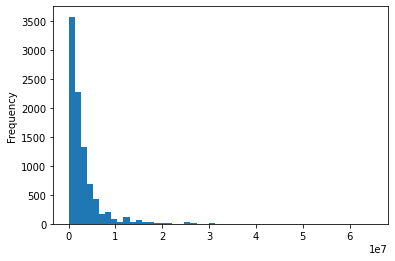

In [14]:
dados_vendas["Valor_anuncio_float"].plot.hist(bins = 50)

In [15]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [16]:
dados_vendas[["Rua", "Bairro", "Cidade"]].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


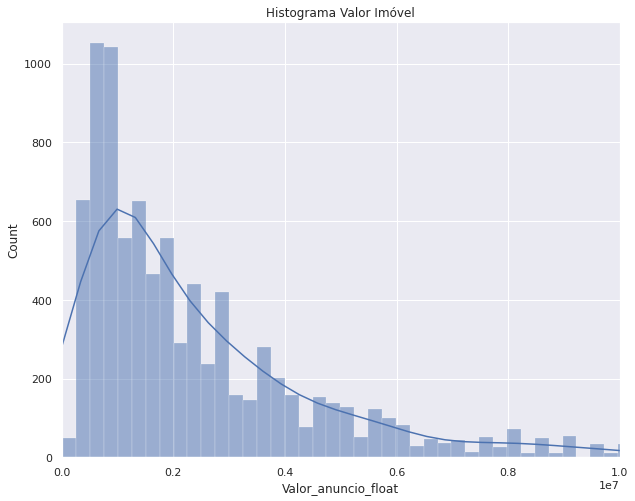

In [17]:
srn.set()
plt.figure(figsize=(10, 8))
ax = srn.histplot(data = dados_vendas, x = "Valor_anuncio_float", kde = True)
ax.set_title("Histograma Valor Imóvel")
plt.xlim((-50, 10000000))
plt.show()

#Desafio Aula 2

1.  Criar uma escala de valores em milhões
2. Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)
3. Preço do metro quadrado por bairro e plotar em um gráfico ideal
4. Explorar as bibliotecas de visualizações e colocar as suas conclusão
5. Pesquisar um visualização para analisar os quartis, mediana e outliers



In [20]:
# 1 - Criar uma escala de valores em milhoes (10^6)

dados_vendas.loc['Valor_anuncio_milhoes'] = dados_vendas['Valor_anuncio_float'].apply(lambda i: i/(1000000))
dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio_float,Valor_anuncio_milhoes
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000.00,4.00,8.00,6.00,R$ 7.000.000,7000000.00,7.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496.00,4.00,4.00,4.00,R$ 3.700.000,3700000.00,3.70
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125.00,4.00,3.00,2.00,R$ 380.000,380000.00,0.38
3,NaN,Jardim Morumbi,São Paulo,310.00,3.00,2.00,4.00,R$ 685.000,685000.00,0.69
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100.00,3.00,2.00,2.00,R$ 540.000,540000.00,0.54


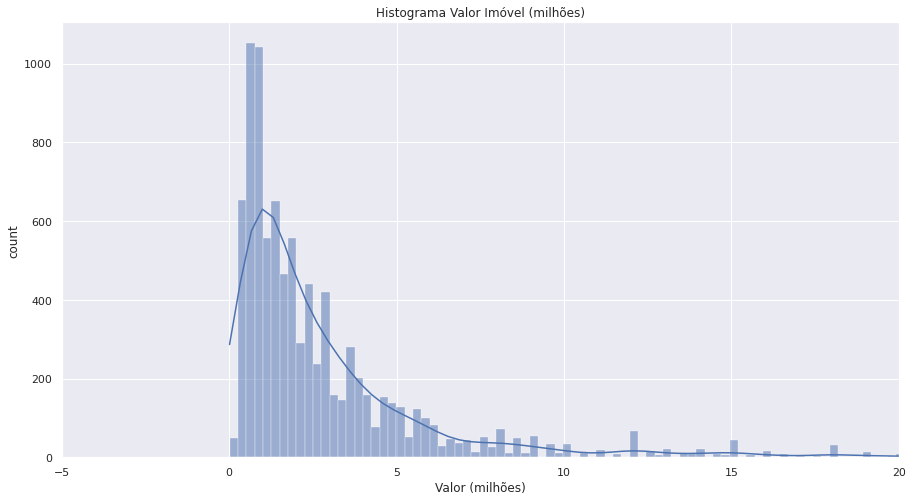

In [48]:
# 2.1 - Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)

plt.figure(figsize=(15, 8))
ax = srn.histplot(data = dados_vendas, x = "Valor_anuncio_milhoes", kde = True)
ax.set_title("Histograma Valor Imóvel (milhões)")
plt.xlim((-5, 20))
plt.xlabel('Valor (milhões)')
plt.ylabel('count')
plt.show()

In [86]:
# 2.2 - Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)

fig = px.histogram(dados_vendas, 
                   x="Valor_anuncio_milhoes", 
                   range_x=[-5,20], 
                   title='Distribuição do valor dos imóveis',
                   labels={'Valor_anuncio_milhoes':'Valor (milhoes)'}, # can specify one label per df column
                   opacity=0.8,
                   color_discrete_sequence=['indianred'])
kde_values = [dados_vendas[~dados_vendas['Valor_anuncio_milhoes'].isnull()]['Valor_anuncio_milhoes'].tolist()]
fig.add_traces(ff.create_distplot(kde_values, group_labels=['Valor_anuncio_milhoes'], show_hist=False).update_traces(yaxis="y3", name="kde").data) 
fig.update_layout(yaxis3={"overlaying": "y", "side": "right"}, showlegend=False)
fig.show()